# Practica-6 Proporciones, distribuciones y cantidades
Para esta práctica usar:
- Dataset: Inmigración canadiense de 1980 a 2013
- Gráficos de Área
- Gráficos de barras verticales, con marcas de tendencia

In [47]:
import numpy as np  # útil para muchos cálculos científicos en Python
import pandas as pd # biblioteca primaria de estructura de datos

In [48]:
df_can = pd.read_excel('Canada.xls',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )


In [49]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


Vamos hacer una limpieza de los datos para facilitar la creación de las visualizaciones.
* Remover las columnas 'AREA', 'REG', 'DEV', 'Type', 'Coverage'.
* Definir nombres más adecuados a las columnas 'OdName', 'AreaName' y 'RegName'.
* Asegurarse de que todas las columnas (DataFrame.columns) corresponden a tipo *string*.
* Usar el método *set_index()* del dataFrame para que los índices de las entradas sean los Paises.
* Adicionar una columna de "Total", en donde esta represente la suma del flujo total de migrantes hacia Canada desde los diferentes paises a lo largo de los años.


In [50]:
df_can.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

In [51]:
# Limpiar el conjunto de datos para eliminar columnas innecesarias (por ejemplo, REG)
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

# Cambiemos el nombre de las columnas para que tengan sentido
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# Para tener coherencia, también hagamos que todas las etiquetas de columna sean de tipo cadena
df_can.columns = list(map(str, df_can.columns))

# Se agrega una columna de Total
df_can['Total'] = df_can.sum(axis=1)

# Años que usaremos en esta practica - útil para trazar más adelante
years = list(map(str, range(1980, 2014)))
print ('data dimensions:', df_can.shape)

data dimensions: (195, 39)


/var/folders/7n/jy1_ycd91snbbhld0x37jht80000gn/T/ipykernel_84366/1945499084.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


In [52]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [53]:
# Examinemos los tipos de etiquetas de columna
all(isinstance(column, str) for column in df_can.columns)

df_can.columns = list(map(str, df_can.columns))

# Ahora vamos a comprobar los tipos de etiquetas de columna
all(isinstance(column, str) for column in df_can.columns)
df_can.set_index('Country', inplace=True)

# Veamos los primeros cinco elementos y veamos cómo se cambió el marco de datos
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


# Gráficas de línea

El diagrama de líneas es una herramienta útil para mostrar varias variables dependientes contra una variable independiente. Sin embargo, se recomienda no más de 5-10 líneas en un solo gráfico; más que eso y se vuelve difícil de interpretar.

**Actividad**: Compare la tendencia de los 5 principales países que más contribuyeron a la inmigración a Canadá.

In [54]:
import matplotlib as mpl
import matplotlib.pyplot as plt

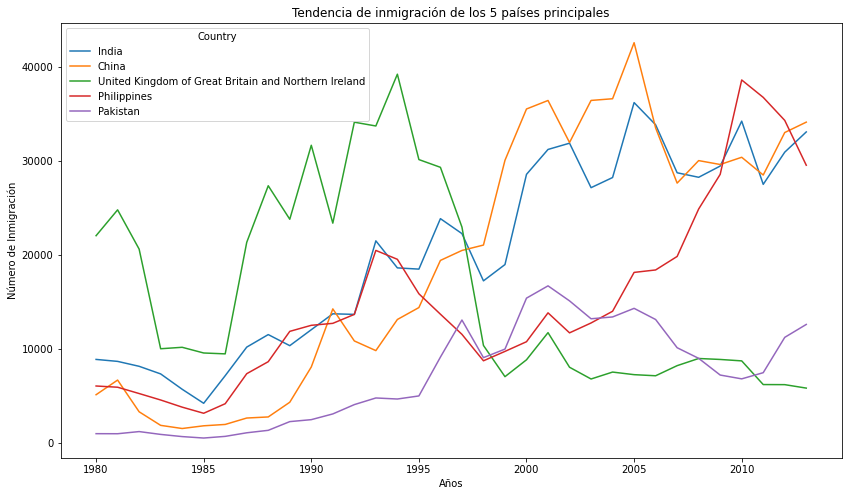

In [55]:
df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)
df_top5 = df_can.head(5)
df_top5 = df_top5[years].transpose()
 
# print(df_top5)
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind='line', figsize=(14,8))
 
plt.title('Tendencia de inmigración de los 5 países principales')
plt.ylabel('Número de Inmigración')
plt.xlabel('Años')
plt.show()

# Gráficas de área

Con una pequeña modificación al código, podemos visualizar este diagrama como un _Diagrama acumulativo_, también conocido como **Diagrama de Líneas Apiladas** o _Diagrama de áreas_.

In [56]:
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# Obtener las 5 principales entradas
df_top5 = df_can.head()

# Transponer el marco de datos
df_top5 = df_top5[years].transpose() 

df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


Los gráficos de área se apilan de forma predeterminada. Y para producir un gráfico de áreas apiladas, cada columna debe tener valores positivos o negativos (cualquier valor de NaN se establecerá de forma predeterminada en 0). Para producir un gráfico no apilado, pase `stacked=False`.

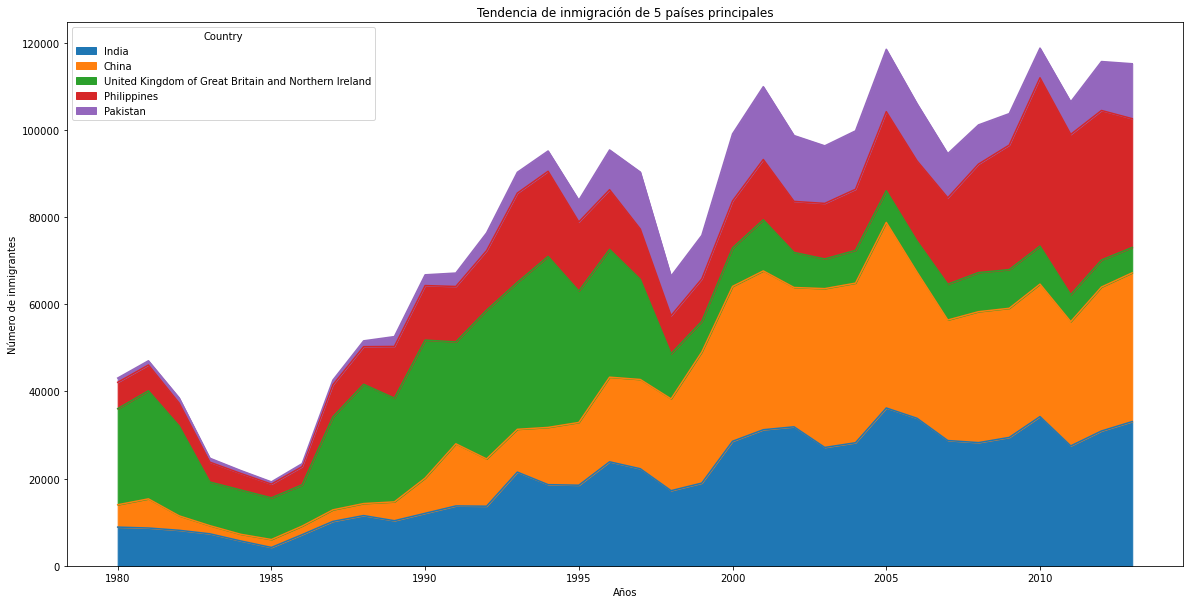

In [57]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# Cambiemos los valores de índice de df_top5 para escribir un número entero para trazar
# df_top5.index = df_top5.index.map(int) 
df_top5.plot(kind='area', 
             figsize=(20, 10), # pasar una tupla de tamaño (x,y)
             )

plt.title('Tendencia de inmigración de 5 países principales')
plt.ylabel('Número de inmigrantes')
plt.xlabel('Años')

plt.show()

Presentarlo ahora como porcentaje de proporciones

In [58]:
df_perc = df_top5.divide(df_top5.sum(axis=1), axis=0)
df_perc.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,0.206142,0.118927,0.511758,0.140469,0.022704
1981,0.184307,0.142046,0.527115,0.125869,0.020663
1982,0.211473,0.085866,0.535237,0.136249,0.031175
1983,0.297350,0.075492,0.405827,0.184861,0.036470
1984,0.260814,0.069822,0.465021,0.173800,0.030544


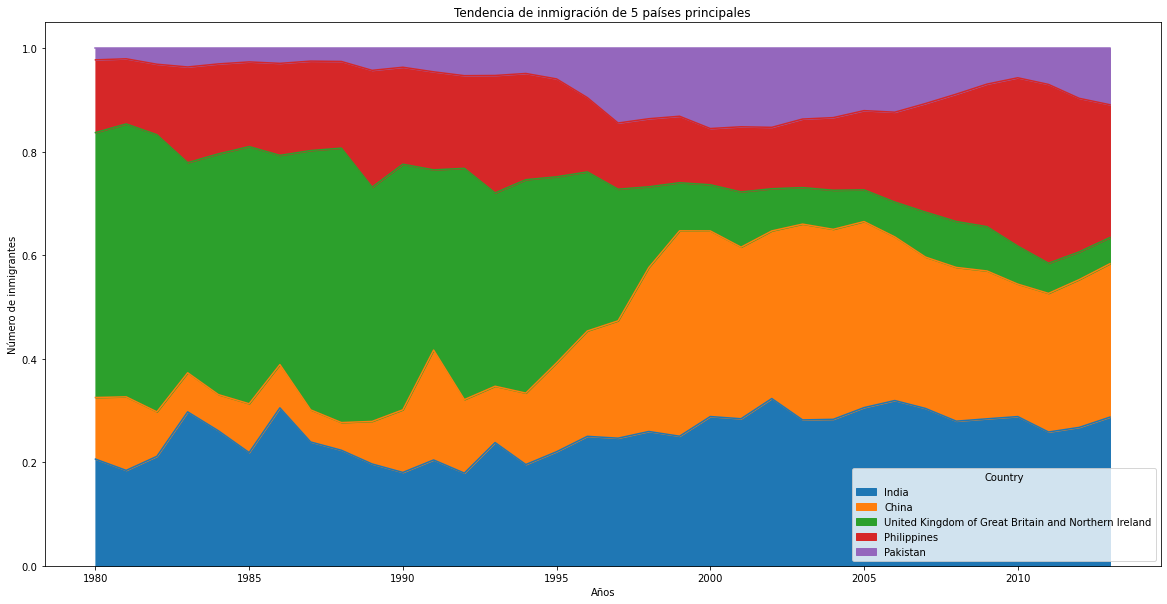

In [59]:
df_perc.plot(kind='area', 
             figsize=(20, 10), # pasar una tupla de tamaño (x,y)
             )

plt.title('Tendencia de inmigración de 5 países principales')
plt.ylabel('Número de inmigrantes')
plt.xlabel('Años')

plt.show()

**Actividad**: Use la capa Artist (método orientado a objetos) para crear un diagrama de área no apilada de los 5 países que menos contribuyeron a la inmigración a Canadá **desde** 1980 hasta 2013. Use un valor de transparencia de 0.55.

In [60]:
# Obtener los 5 paises con menor aporte
df_least5 = df_can.tail(5)

# Transponer el marco de datos
df_least5 = df_least5[years].transpose() 

df_least5.head()

Country,San Marino,New Caledonia,Marshall Islands,Western Sahara,Palau
1980,1,0,0,0,0
1981,0,0,0,0,0
1982,0,0,0,0,0
1983,0,0,0,0,0
1984,0,0,0,0,0


Text(0.5, 0, 'Años')

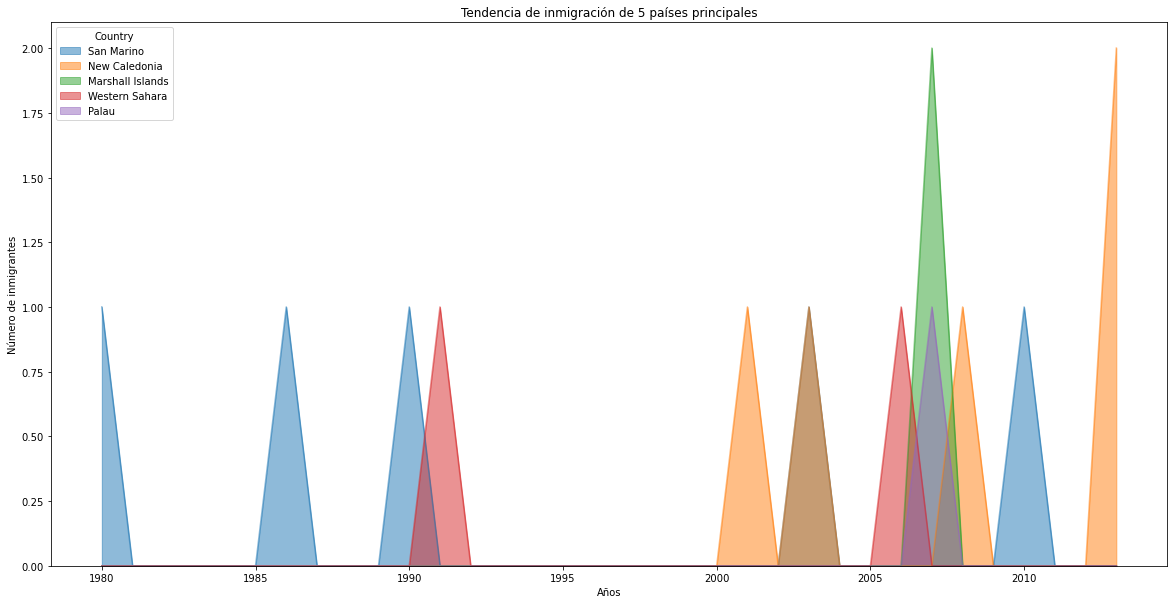

In [61]:
df_least5.plot(kind='area', 
             figsize=(20, 10), # pasar una tupla de tamaño (x,y)
             stacked=False,
             )

plt.title('Tendencia de inmigración de 5 países principales')
plt.ylabel('Número de inmigrantes')
plt.xlabel('Años')

Text(0.5, 0, 'Años')

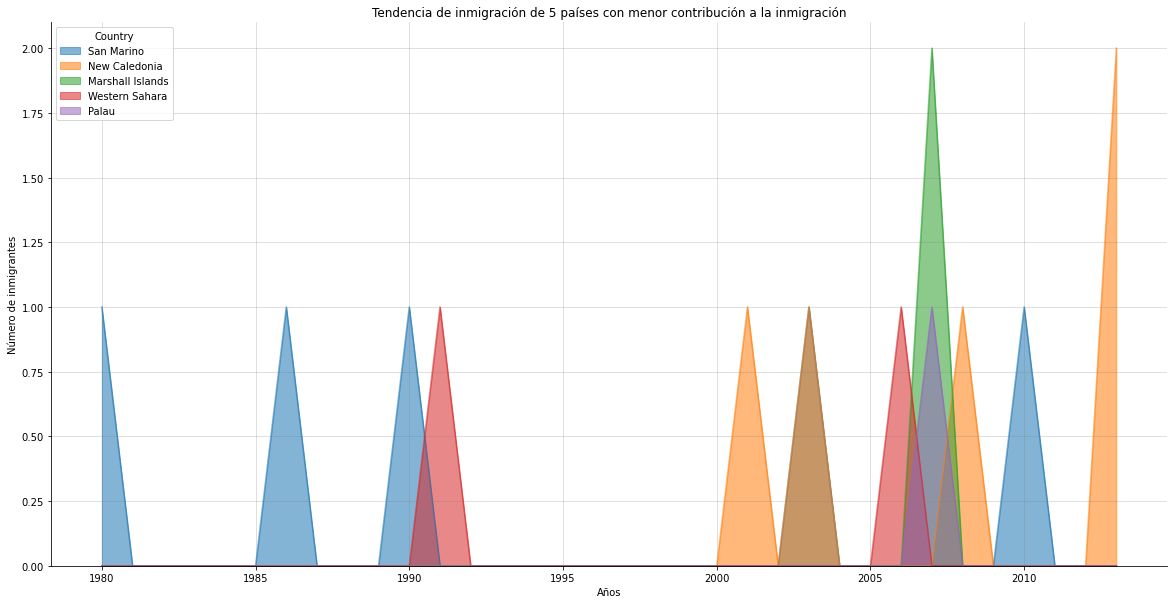

In [62]:
# cambiemos los valores de índice de df_least5 para escribir un número entero para trazar
df_least5.index = df_least5.index.map(int) 

ax = df_least5.plot(kind='area', alpha=0.55, stacked=False, figsize=(20, 10))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(color='grey', linestyle='-', linewidth=0.5, alpha=0.5)

ax.set_title('Tendencia de inmigración de 5 países con menor contribución a la inmigración')
ax.set_ylabel('Número de inmigrantes')
ax.set_xlabel('Años')


**Actividad**: Utilice la capa de secuencias (método procesal) de comandos para crear un gráfico de áreas apiladas de los 5 países que menos contribuyeron a la inmigración a Canadá entre 1980 y 2013. Utilice un valor de transparencia de 0,45.

In [63]:
df_can.sort_values(['Total'], ascending = True, axis = 0, inplace = True)

# Obtener las 5 entradas principales
df_least5 = df_can.head()

# Transponer el marco de datos
df_least5 = df_least5[years].transpose()

df_least5.head()

Country,Palau,Western Sahara,Marshall Islands,New Caledonia,San Marino
1980,0,0,0,0,1
1981,0,0,0,0,0
1982,0,0,0,0,0
1983,0,0,0,0,0
1984,0,0,0,0,0


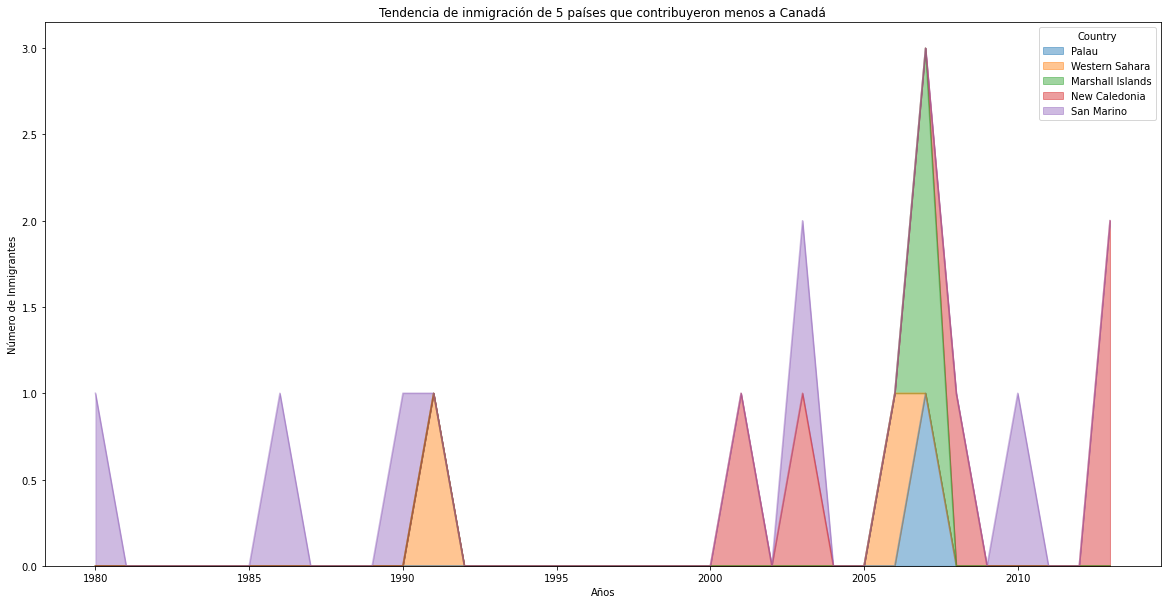

In [64]:
df_least5.index = df_least5.index.map(int) # cambie el valor del índice para escribir un número entero
df_least5.plot(kind='area', 
             alpha=0.45, # 0-1, valor por defecto a= 0.5
             stacked=True,
             figsize=(20, 10),
            )

plt.title('Tendencia de inmigración de 5 países que contribuyeron menos a Canadá')
plt.ylabel('Número de Inmigrantes')
plt.xlabel('Años')

plt.show()

# Gráficos de barras (marco de datos) <a id="10"></a>

Un gráfico de barras es una forma de representar datos donde la _longitud_ de las barras representa la magnitud/tamaño de la característica/variable. Los gráficos de barras generalmente representan variables numéricas y categóricas agrupadas en intervalos.

Para crear un gráfico de barras, podemos pasar uno de los dos argumentos a través del parámetro `kind` en `plot()`:

-   `kind=bar` crea un gráfico de barras _vertical_
-   `kind=barh` crea un gráfico de barras _horizontal_


# Gráfica de barras verticales

En los gráficos de barras verticales, el eje $x$ se usa para etiquetar, y la longitud de las barras en el eje $y$ corresponde a la magnitud de la variable que se mide. Los gráficos de barras verticales son particularmente útiles para analizar datos de series de tiempo. Una desventaja es que carecen de espacio para el etiquetado de texto al pie de cada barra.

**Empecemos analizando el efecto de la crisis financiera de Islandia:**

La crisis financiera islandesa de 2008 - 2011 fue un evento económico y político importante en Islandia. En relación con el tamaño de su economía, el colapso bancario sistémico de Islandia fue el mayor experimentado por cualquier país en la historia económica. La crisis condujo a una grave depresión económica entre 2008 y 2011 y a un importante malestar político.

**Actividad:** Comparemos el número de Inmigrantes islandeses (país = 'Islandia') en Canadá desde el año 1980 hasta el 2013.

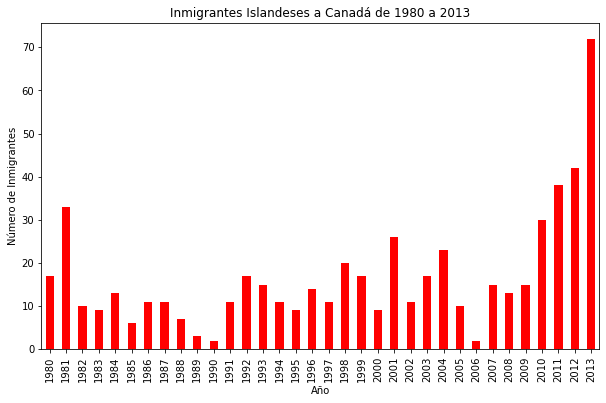

In [65]:
# Paso 1: obtener los datos
df_iceland = df_can.loc['Iceland', years]
df_iceland.head()

# Paso 2: graficar datos
df_iceland.plot(kind='bar', figsize=(10, 6), color="red")

plt.xlabel('Año') # agregue la etiqueta "x" a la trama
plt.ylabel('Número de Inmigrantes') # agregue la etiqueta "y" a la trama
plt.title('Inmigrantes Islandeses a Canadá de 1980 a 2013') # añadir título a la trama

plt.show()

El diagrama de barras de arriba muestra el número total de inmigrantes desglosados por cada año. Podemos ver claramente el impacto de la crisis financiera; el número de inmigrantes a Canadá comenzó a aumentar rápidamente después de 2008.

Anotemos esto en el gráfico usando el método `annotate` de la capa de secuencias de comandos **scripting layer** o la interfaz pyplot **pyplot interface**. Pasaremos los siguientes parámetros:

- `s`: str, el texto de la anotación.
- `xy`: Tupla que especifica el punto (x,y) a anotar (en este caso, el punto final de la flecha).
- `xytext`: Tupla que especifica el punto (x,y) para colocar el texto (en este caso, punto de inicio de la flecha).
- `xycoords`: El sistema de coordenadas en el que se da xy - 'data' usa el sistema de coordenadas del objeto que se está anotando (predeterminado).
- `arrowprops`: Toma un diccionario de propiedades para dibujar la flecha:
    - `arrowstyle`: Especifica el estilo de la flecha, `'->'` es la flecha estándar.
    - `connectionstyle`: Especifica el tipo de conexión. `arc3` es una línea recta.
    - `color`: especifica el color del error.
    - `lw`: Especifica el ancho de línea.

Puede leer la documentación de Matplotlib para obtener más detalles sobre las anotaciones: 
[http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.annotate](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.annotate?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).

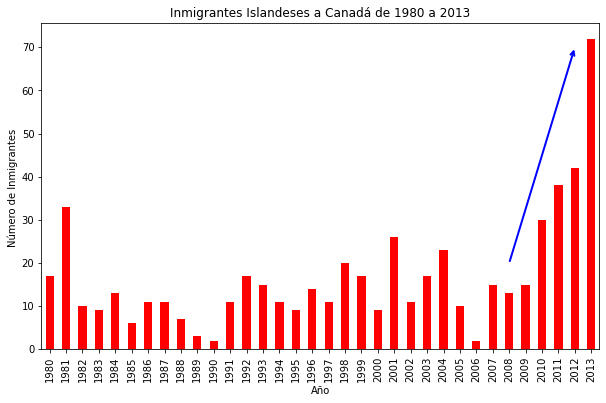

In [66]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90, color="red") # gire los xticks (puntos etiquetados en el eje x) 90 grados

plt.xlabel('Año')
plt.ylabel('Número de Inmigrantes ')
plt.title('Inmigrantes Islandeses a Canadá de 1980 a 2013')

# Anotar flecha
plt.annotate('',                      # s: str. Lo dejará en blanco para que no haya texto.
             xy=(32, 70),             # coloque la punta de la flecha en el punto (año 2012, pop 70)
             xytext=(28, 20),         # coloque la base de la flecha en el punto (año 2008, pop 20)
             xycoords='data',         # utilizará el sistema de coordenadas del objeto que se está anotando
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

plt.show()

Anotemos también un texto para pasar por encima de la flecha. Pasaremos los siguientes parámetros adicionales:

-   `rotation`: ángulo de rotación del texto en grados (en sentido antihorario)
-   `va`: Alineación vertical del texto [‘center’ | ‘top’ | ‘bottom’ | ‘baseline’]
-   `ha`: Alineación horizontal del texto [‘center’ | ‘right’ | ‘left’]


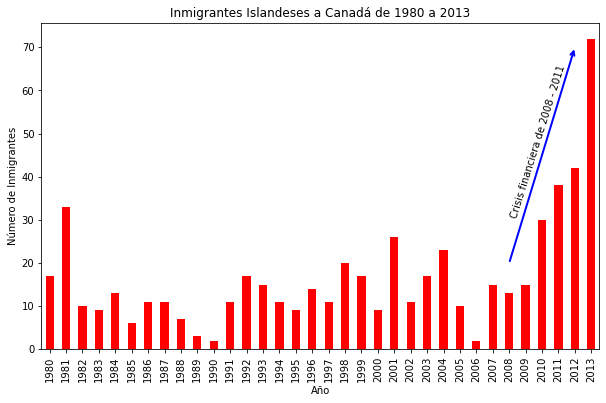

In [67]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90, color='red') 

plt.xlabel('Año')
plt.ylabel('Número de Inmigrantes')
plt.title('Inmigrantes Islandeses a Canadá de 1980 a 2013')

# Anotar flecha
plt.annotate('',                      # s: str. Lo dejará en blanco para que no haya texto
             xy=(32, 70),             # coloque la punta de la flecha en el punto (año 2012, pop 70)
             xytext=(28, 20),         # coloque la base de la flecha en el punto (año 2008, pop 20)
             xycoords='data',         # utilizará el sistema de coordenadas del objeto que se está anotando
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

# Anotar texto
plt.annotate('Crisis financiera de 2008 - 2011', # texto para mostrar
             xy=(28, 30),                    # comience el texto en un punto (año 2008, pop 30) 
             rotation=72.5,                  # basado en prueba y error para que coincida con la flecha
             va='bottom',                    # desea que el texto se alinee verticalmente en la "inferior"
             ha='left',                      # desea que el texto esté alineado horizontalmente a la 'izquierda'.
            )

plt.show()

# EJERCICIO:
Repita el proceso anterior para estudiar la crisis financiera de Argentina en el 2003.

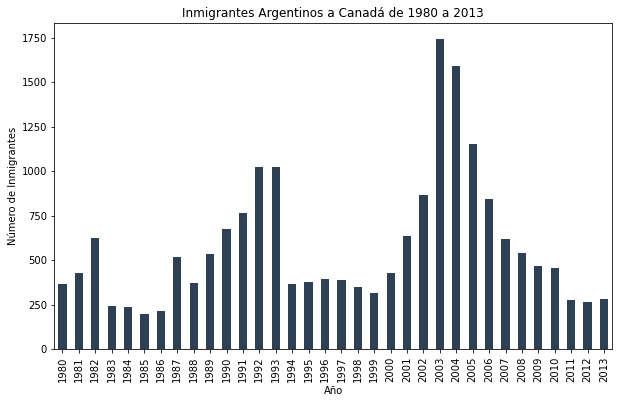

In [68]:
df_arg = df_can.loc['Argentina', years]
df_arg.head()

# Paso 2: graficar datos
df_arg.plot(kind='bar', figsize=(10, 6), color="#2E4053")

plt.xlabel('Año') # agregue la etiqueta "x" a la trama
plt.ylabel('Número de Inmigrantes') # agregue la etiqueta "y" a la trama
plt.title('Inmigrantes Argentinos a Canadá de 1980 a 2013') # añadir título a la trama

plt.show()

De acuerdo a Wikipedia podemos encontrar que Macroeconómicamente hablando, el período crítico se inició con la disminución del PBI (producto bruto interno) real en 1998 y terminó en 2001 con el final de la convertibilidad. Pero fue hasta el 2003 con la toma de poder de Néstor Kirscher que inició la recumepración de la economía.

In [ ]:
df_arg = df_arg.reset_index()

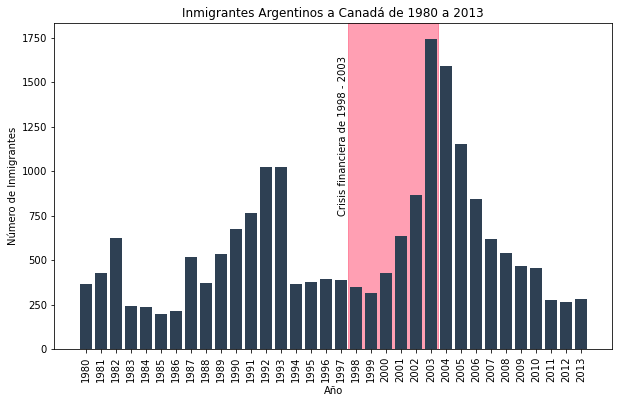

In [116]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

#df_arg.plot(kind='bar', figsize=(10, 6), color="#2E4053")
ax.bar(df_arg['index'], df_arg['Argentina'], color="#2E4053")
plt.xlabel('Año') # agregue la etiqueta "x" a la trama
plt.ylabel('Número de Inmigrantes') # agregue la etiqueta "y" a la trama
plt.title('Inmigrantes Argentinos a Canadá de 1980 a 2013') # añadir título a la trama
plt.xticks(rotation=90)

ax.axvspan(17.5, 23.5, color='#FF4069', alpha=0.5, zorder=-1)

plt.annotate('Crisis financiera de 1998 - 2003', # texto para mostrar
             xy=(16.8, 750),                    # comience el texto en un punto (año 2008, pop 30) 
             rotation=90,                  # basado en prueba y error para que coincida con la flecha
             va='bottom',                    # desea que el texto se alinee verticalmente en la "inferior"
             ha='left',                      # desea que el texto esté alineado horizontalmente a la 'izquierda'.
            )

plt.show()

Como era de esperarse, debido a las políticas de convertibilidad, inició un proceso de recesión de la economía argentina, sin embargo, aun así apenas iniciada una crisis las personas pueden presentar resilencia, pero tras un par de años, puede verse el aumento importante en la inmigración frente a políticas sociales y economicas más ineficientes que gravaron la situación. En el 2002 se ve un salto importante en los migrantes argentinos, lo cual coincide con la parte más algida de la crisis social y pólitica: Entre 2001 y 2002 el índice de pobreza alcanzó cifras récord (52.8%) así como también el de desocupación (superior al 21.5%); la fuga de capitales era incontrolable. Este panorama contribuyó a los cacerolazos de fines de 2001 que formaron parte de un estallido popular que causó, entre otros efectos, la renuncia del Ministro de Economía, Domingo Cavallo, y del presidente, Fernando de la Rúa. 



# Introducción a Folium

Folium es una biblioteca de Python que lo ayuda a crear varios tipos de mapas de folletos. El hecho de que los resultados de Folium sean interactivos hace que esta biblioteca sea muy útil para la creación de cuadros de mando.

In [69]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: done

# All requested packages already installed.

Folium installed and imported!


Generar el mapa del mundo es sencillo en Folium. Simplemente se crea un objeto Folium Map y luego lo muestra. Lo atractivo de los mapas de Folium es que son interactivos, por lo que puede hacer zoom en cualquier región de interés a pesar del nivel de zoom inicial.

In [70]:
# Se define el mapa mundial
world_map = folium.Map()

# Se muestra el mapa mundial
world_map

Puede personalizar esta definición predeterminada del mapa mundial especificando el centro de su mapa y el nivel de zoom inicial.

Todas las ubicaciones en un mapa están definidas por sus respectivos valores de Latitud y Longitud. Entonces puede crear un mapa y pasar en un centro de valores de Latitud y Longitud de [0, 0].

Para un centro definido, también puede definir el nivel de zoom inicial en esa ubicación cuando se representa el mapa. Cuanto mayor sea el nivel de zoom, más se acercará el mapa al centro.

Creemos un mapa centrado alrededor de Canadá y juguemos con el nivel de zoom para ver cómo afecta el mapa renderizado.

In [71]:
# Defina el mapa mundial centrado alrededor de Canadá con un nivel de zoom bajo
world_map = folium.Map(location=[56.130, -106.35], zoom_start=4)

# Mostrar el mapa del mundo
world_map

# Mapas de coropletas

Un mapa de coropletas es un mapa temático en el que las áreas están sombreadas o modeladas en proporción a la medida de la variable estadística que se muestra en el mapa, como la densidad de población o el ingreso per cápita. El mapa de coropletas proporciona una manera fácil de visualizar cómo varía una medida en un área geográfica o muestra el nivel de variabilidad dentro de una región. 

Ahora, creemos nuestro propio mapa de coropletas del mundo que represente la inmigración de varios países a Canadá.

Primero descarguemos e importemos nuestro principal conjunto de datos de inmigración canadiense usando el método pandas read_excel(). Normalmente, antes de que podamos hacer eso, necesitaríamos descargar un módulo que pandas requiere para leer en archivos de Excel. Este módulo es xlrd. 

In [72]:
!conda install -c anaconda xlrd --yes

Solving environment: done

# All requested packages already installed.



In [73]:
import pandas as pd # biblioteca primaria de estructura de datos
df_can = pd.read_excel('Canada.xls',
                     sheet_name='Canada by Citizenship',
                     skiprows=range(20),
                     skipfooter=2)

In [74]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [75]:
# limpiar el conjunto de datos para eliminar columnas innecesarias (por ejemplo, REG)
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

# cambiemos el nombre de las columnas para que tengan sentido
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# para tener coherencia, también hagamos que todas las etiquetas de columna sean de tipo cadena
df_can.columns = list(map(str, df_can.columns))

# agregar columna Total
df_can['Total'] = df_can.sum(axis=1)

# años que usaremos en esta lección - útil para trazar más adelante
years = list(map(str, range(1980, 2014)))
print ('data dimensions:', df_can.shape)

data dimensions: (195, 39)


/var/folders/7n/jy1_ycd91snbbhld0x37jht80000gn/T/ipykernel_84366/3088113679.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


In [76]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


Para crear un mapa de coropletas, necesitamos un archivo GeoJSON que defina las áreas/límites del estado, condado o país que nos interesa. En nuestro caso, dado que nos esforzamos por crear un mapa mundial, queremos un GeoJSON que define los límites de todos los países del mundo. Llamémoslo world_countries.json.

Ahora que tenemos el archivo GeoJSON, vamos a crear un mapa mundial, centrado alrededor de los valores de latitud y longitud [0, 0], con un nivel de zoom inicial de 2 y usando el estilo Mapbox Bright.

In [77]:
import folium

world_geo = r'world_countries.json' # geojson file

# crear un mapa plano del mundo
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')

Y ahora para crear un mapa de coropletas, usaremos el método de coropletas con los siguientes parámetros principales:

- geo_data, que es el archivo GeoJSON.

- data, que es el marco de datos que contiene los datos.

- columns, que representa las columnas en el marco de datos que se usarán para crear el mapa de coropletas.

- key_on, que es la clave o variable en el archivo GeoJSON que contiene el nombre de la variable de interés. Para determinar eso, deberá abrir el archivo GeoJSON usando cualquier editor de texto y anotar el nombre de la clave o variable que contiene el nombre de los países, ya que los países son nuestra variable de interés. En este caso, nombre es la clave en el archivo GeoJSON que contiene el nombre de los países. Tenga en cuenta que esta clave distingue entre mayúsculas y minúsculas, por lo que debe pasar exactamente como existe en el archivo GeoJSON.

In [78]:
 # Generar un mapa de coropletas utilizando la inmigración total de cada país a Canadá desde 1980 hasta 2013
world_map.choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Inmigración a Canadá'
    )
    # display map
world_map